<h2>Fashion MNIST dataset in Keras library</h2>

## Imports

In [1]:
# - TensorFlow
import tensorflow as tf
# - Dataset
from tensorflow.keras.datasets import fashion_mnist
# - Helper libraries
import numpy as np
import pandas as pd
import time
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
# - Graph plots
%matplotlib inline
from matplotlib import pyplot as plt
# - Keras models and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Convolution2D, MaxPooling2D

# Print some stuff
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.2.0


<h2>Load data</h2>

In [3]:
# Load pre-shuffled Fashion MNIST data into train and test sets
(X_train, y_train_raw), (X_test, y_test_raw) = fashion_mnist.load_data()

# Convert to float values and normalize between 0...1
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255 
X_test /= 255

# Preprocess class labels
# Convert labels to 10-dimensional one-hot vectors
y_train = to_categorical(y_train_raw, 10)
y_test = to_categorical(y_test_raw, 10)

print("Training instances: {}".format(X_train.shape[0]))
print("Test instances: {}".format(X_test.shape[0]))
print()
print("Structure of training set: {}".format(X_train.shape))
print("Structure of labels set: {}".format(y_train.shape))

Training instances: 60000
Test instances: 10000

Structure of training set: (60000, 28, 28)
Structure of labels set: (60000, 10)


<h2>Pre-process data for 1D or 2D inputs</h2>

In [4]:
# Preprocess for 1D input data
X_train_1D = X_train.reshape(X_train.shape[0], 784)
X_test_1D = X_test.reshape(X_test.shape[0], 784)
print("1D shape:", X_train_1D.shape)

# Preprocess for 2D input data
X_train_2D = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_2D = X_test.reshape(X_test.shape[0], 28, 28, 1)
print("2D shape:", X_train_2D.shape)

1D shape: (60000, 784)
2D shape: (60000, 28, 28, 1)


## Linear model

Epoch 1/6
844/844 [==============================] - 1s 1ms/step - loss: 0.6706 - accuracy: 0.7782 - val_loss: 0.5122 - val_accuracy: 0.8252
Epoch 2/6
844/844 [==============================] - 1s 962us/step - loss: 0.4890 - accuracy: 0.8355 - val_loss: 0.4605 - val_accuracy: 0.8425
Epoch 3/6
844/844 [==============================] - 1s 957us/step - loss: 0.4544 - accuracy: 0.8453 - val_loss: 0.4476 - val_accuracy: 0.8467
Epoch 4/6
844/844 [==============================] - 1s 957us/step - loss: 0.4369 - accuracy: 0.8524 - val_loss: 0.4310 - val_accuracy: 0.8482
Epoch 5/6
844/844 [==============================] - 1s 921us/step - loss: 0.4251 - accuracy: 0.8549 - val_loss: 0.4236 - val_accuracy: 0.8533
Epoch 6/6
844/844 [==============================] - 1s 950us/step - loss: 0.4176 - accuracy: 0.8574 - val_loss: 0.4235 - val_accuracy: 0.8502

Test Accuracy: 83.87%
Time elapsed: 5.57 sec


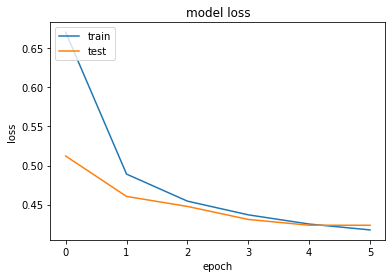

In [5]:
# Create Linear Softmax model
lin_clf = Sequential()
lin_clf.add(Dense(10, input_dim=784, activation="softmax"))

# Compile model
lin_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = lin_clf.fit(X_train_1D, y_train, batch_size=64, epochs=6, validation_split=0.1, verbose=1)
# Evaluate model on test data
score = lin_clf.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## NN model

Epoch 1/8
844/844 [==============================] - 1s 2ms/step - loss: 0.6091 - accuracy: 0.7819 - val_loss: 0.4158 - val_accuracy: 0.8480
Epoch 2/8
844/844 [==============================] - 1s 1ms/step - loss: 0.4296 - accuracy: 0.8443 - val_loss: 0.3745 - val_accuracy: 0.8590
Epoch 3/8
844/844 [==============================] - 1s 1ms/step - loss: 0.3888 - accuracy: 0.8577 - val_loss: 0.3571 - val_accuracy: 0.8660
Epoch 4/8
844/844 [==============================] - 1s 1ms/step - loss: 0.3642 - accuracy: 0.8677 - val_loss: 0.3437 - val_accuracy: 0.8713
Epoch 5/8
844/844 [==============================] - 1s 1ms/step - loss: 0.3497 - accuracy: 0.8715 - val_loss: 0.3318 - val_accuracy: 0.8780
Epoch 6/8
844/844 [==============================] - 1s 1ms/step - loss: 0.3383 - accuracy: 0.8750 - val_loss: 0.3306 - val_accuracy: 0.8845
Epoch 7/8
844/844 [==============================] - 1s 1ms/step - loss: 0.3274 - accuracy: 0.8794 - val_loss: 0.3288 - val_accuracy: 0.8795
Epoch 8/8
844

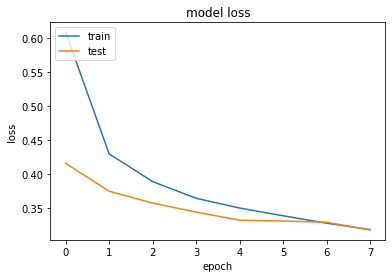

In [6]:
# Create Neural Net Softmax model
nn_clf = Sequential()
# - first Dense
nn_clf.add(Dense(128, input_dim=784, activation="relu", kernel_initializer="normal"))
nn_clf.add(Dropout(0.2))
# - second Dense
nn_clf.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
nn_clf.add(Dropout(0.2))
# - output
nn_clf.add(Dense(10, activation="softmax"))

# Compile model
nn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = nn_clf.fit(X_train_1D, y_train, batch_size=64, epochs=8, validation_split=0.1, verbose=1)
# Evaluate model on test data
score = nn_clf.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## ConvNet model

Epoch 1/8
844/844 [==============================] - 27s 32ms/step - loss: 0.5575 - accuracy: 0.7974 - val_loss: 0.3604 - val_accuracy: 0.8678
Epoch 2/8
844/844 [==============================] - 27s 32ms/step - loss: 0.3747 - accuracy: 0.8647 - val_loss: 0.3119 - val_accuracy: 0.8832
Epoch 3/8
844/844 [==============================] - 27s 32ms/step - loss: 0.3291 - accuracy: 0.8788 - val_loss: 0.2782 - val_accuracy: 0.8972
Epoch 4/8
844/844 [==============================] - 27s 32ms/step - loss: 0.2992 - accuracy: 0.8910 - val_loss: 0.2516 - val_accuracy: 0.9042
Epoch 5/8
844/844 [==============================] - 27s 32ms/step - loss: 0.2851 - accuracy: 0.8948 - val_loss: 0.2481 - val_accuracy: 0.9078
Epoch 6/8
844/844 [==============================] - 27s 32ms/step - loss: 0.2683 - accuracy: 0.9015 - val_loss: 0.2456 - val_accuracy: 0.9070
Epoch 7/8
844/844 [==============================] - 28s 33ms/step - loss: 0.2520 - accuracy: 0.9059 - val_loss: 0.2282 - val_accuracy: 0.9115

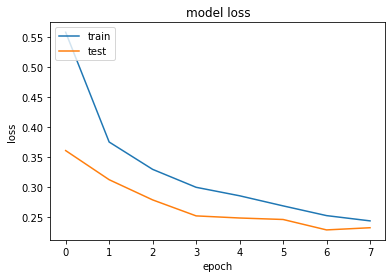

In [7]:
# Create ConvNet model
cnn_clf = Sequential()
# - first conv/pool 
cnn_clf.add(Convolution2D(32, (3,3), input_shape=(28,28,1), activation="relu", padding="same", kernel_initializer="normal"))
cnn_clf.add(MaxPooling2D(pool_size=(2,2))) # reduces size to 14x14
cnn_clf.add(Dropout(0.3))
# - second conv/pool
cnn_clf.add(Convolution2D(64, (3,3), activation="relu", padding="same", kernel_initializer="he_uniform"))
cnn_clf.add(MaxPooling2D(pool_size=(2,2))) # reduces size to 7x7
cnn_clf.add(Dropout(0.3))
# - fully connected
cnn_clf.add(Flatten())
cnn_clf.add(Dense(128, activation="relu"))
cnn_clf.add(Dropout(0.3))
# - output
cnn_clf.add(Dense(10, activation="softmax"))

# Compile model
cnn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = cnn_clf.fit(X_train_2D, y_train, batch_size=64, epochs=8, validation_split=0.1, verbose=1)
# Evaluate model on test data
score = cnn_clf.evaluate(X_test_2D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Confusion matrix</h2>

In [7]:
# Make predictions
y_pred = cnn_clf.predict(X_test_2D)

# Confusion matrix
conf_mx = confusion_matrix(
    np.argmax(y_test,axis=1), 
    np.argmax(y_pred, axis=1))
print(conf_mx)

[[900   0  16  22   4   1  47   0  10   0]
 [  0 981   0  12   2   0   4   0   1   0]
 [ 16   1 885  11  43   0  44   0   0   0]
 [ 10   5   6 949  15   0  14   0   1   0]
 [  0   1  71  32 862   0  33   0   1   0]
 [  0   0   0   0   0 983   0  12   0   5]
 [140   2  79  43  97   0 633   0   6   0]
 [  0   0   0   0   0   4   0 952   0  44]
 [  2   1   1   3   2   1   0   2 988   0]
 [  1   0   0   0   0   4   0  22   0 973]]


<h2>Predict examples</h2>

Predicted: Ankle boot
Actual: Ankle boot


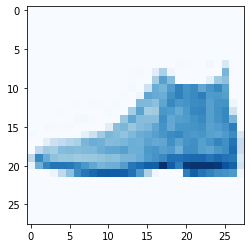

Predicted: Pullover
Actual: Pullover


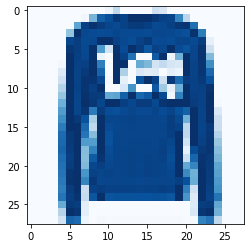

Predicted: Trouser
Actual: Trouser


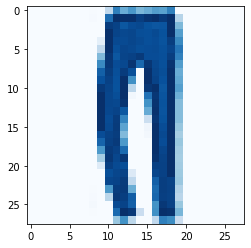

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Examples to classify
examples = X_test_2D[:3]

res = np.argmax(cnn_clf.predict(examples), axis=1)

for i in range(0,len(res)):
    print("Predicted:",class_names[res[i]])
    print("Actual:",class_names[y_test_raw[i]])
    plt.imshow(X_test[i], cmap=plt.cm.Blues)
    plt.show()